In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
import xrd
from importlib import reload
reload(xrd)

<module 'xrd' from '/Users/vekeryk/Projects/master-project-light/xrd.py'>

In [3]:
def load_dataset(filename="10_000.pkl"):
    """Load saved dataset"""
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data['X'], data['Y']

In [4]:
def save_dataset(X_train, Y_train, file_path):
    """Save the training dataset to a file."""
    with open(file_path, 'wb') as f:
        pickle.dump({'X': X_train, 'Y': Y_train}, f)
    print(f"Saved samples to {file_path}")

In [4]:
X_train, Y_train = load_dataset("datasets/dataset_100000_dl400.pkl")
print(X_train.shape)  # -> torch.Size([10000, 3])
print(Y_train.shape)  # -> torch.Size([10000, 100])

(100000, 7)
(100000, 650)


In [5]:
# 170 точок. Функція у PyTorch створює тензор із рівновіддалених чисел між start і end.
x = torch.linspace(0, 170 - 1, 170)
rng = np.random.default_rng()

ValueError: x and y must have same first dimension, but have shapes (170,) and (650,)

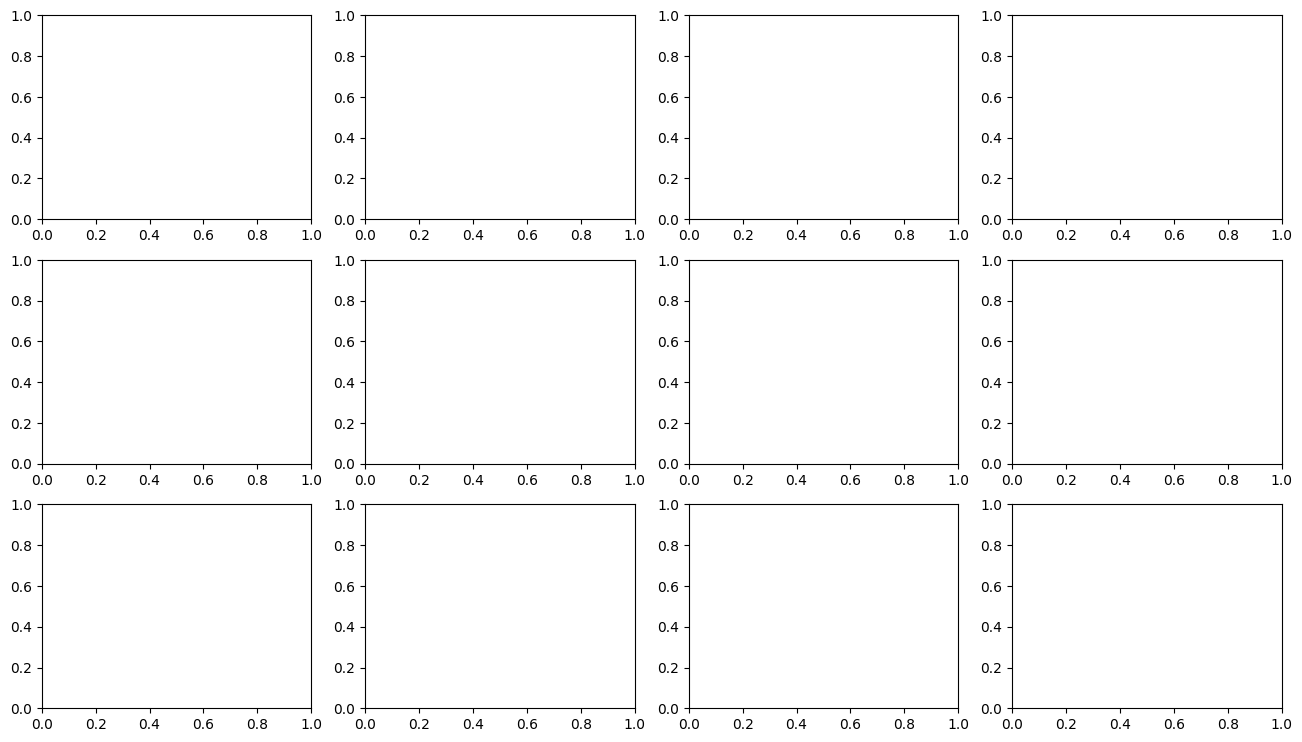

In [7]:
fig, axes = plt.subplots(3, 4, figsize=(16, 9))  # 3 rows, 4 columns

for i, ax in enumerate(axes.flat):
    rand_idx = np.random.randint(0, X_train.shape[0])
    # ax.plot(x, Y_train[rand_idx].cpu().numpy(), label=f"Curve {rand_idx}")
    # x_vals = X_train[rand_idx].cpu().numpy()
    ax.plot(x, Y_train[rand_idx], label=f"Curve {rand_idx}")
    x_vals = X_train[rand_idx]
    ax.set_title(f"Sample {rand_idx}\nX_train: [{x_vals[0]:.4f}, {x_vals[1]:.4f}, {x_vals[4]:.4f}]")
    ax.grid(True)
    ax.set_ylim(0, 0.01)

plt.tight_layout()
plt.show()


In [ ]:
import xrd
from importlib import reload
reload(xrd)

# X_train, Y_train = xrd.generate_train_dataset(10000)

Invalid D01 value: 0.002 0.0014194093260580225
Invalid D01 value: 0.004402709374180929 0.0
Invalid D01 value: 0.007030771194787184 0.0011525013261528038
Invalid D01 value: 0.004456693123339057 0.0
Invalid D01 value: 0.006740434984716794 0.0
Invalid D01 value: 0.0062036140227252545 0.001960381216169228
Invalid D01 value: 0.011122737720083601 0.0005688503475493947
Invalid D01 value: 0.006252928290742735 0.0013147470955362905
Invalid D01 value: 0.002 0.0007199931384178175
Invalid D01 value: 0.0023127816998964705 0.0
Invalid D01 value: 0.005448953848571742 0.001567157067816299
Invalid D01 value: 0.002017079813831211 0.0014256133608069282
Invalid D01 value: 0.003621739490572203 0.0
Invalid D01 value: 0.004542947293920407 0.0
Invalid D01 value: 0.004124502557072878 0.0015339237516342006
Invalid D01 value: 0.0030079211600082378 0.000165749523323825
Invalid D01 value: 0.004245499084312849 0.0010895497816796563
Invalid D01 value: 0.003059982871583897 0.0019996668612241686
Invalid D01 value: 0.0

<Figure size 1200x600 with 0 Axes>

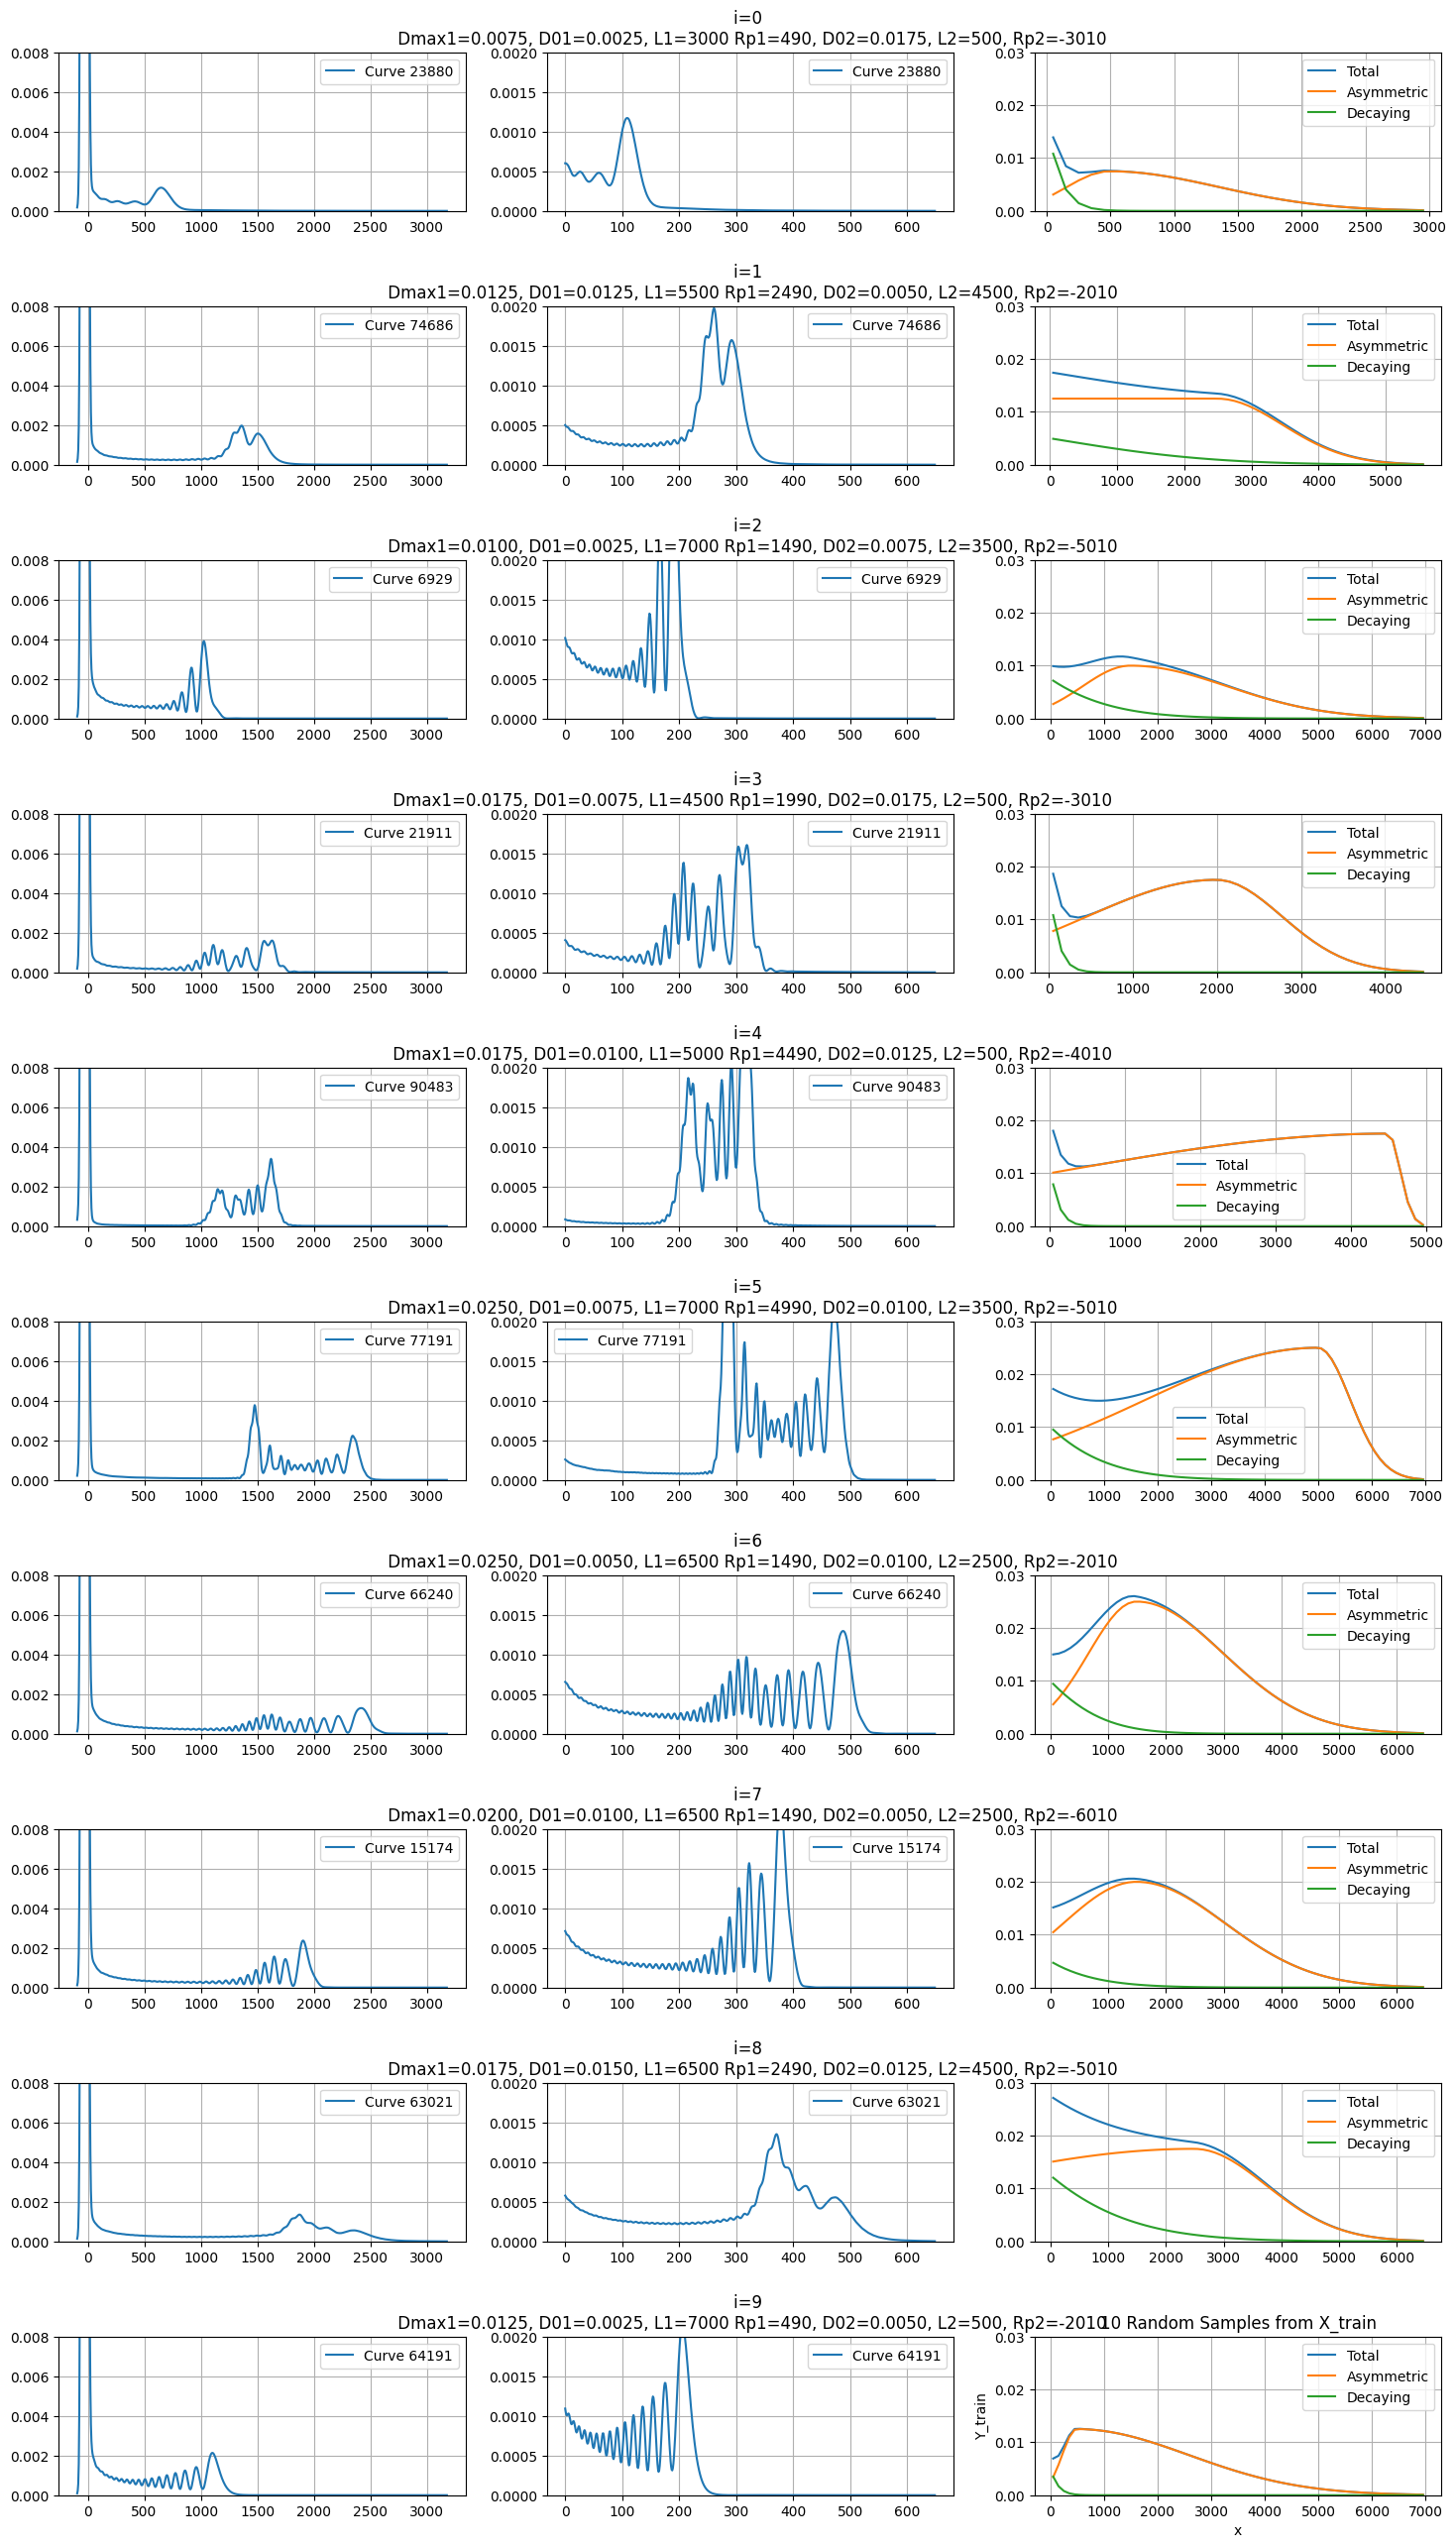

In [10]:
# random examples from X_train, Y_train

import helpers as h
import xrd
from importlib import reload
reload(xrd)
reload(h)

rng = np.random.default_rng()
indices = rng.choice(X_train.shape[0], size=10, replace=False)
plt.figure(figsize=(12, 6))

fig, axes = plt.subplots(len(indices), 3, figsize=(18, 32))
plt.subplots_adjust(hspace=0.6)  # add vertical space between rows

# for idx in indices:
#     # plt.plot(x.cpu().numpy(), Y_train[idx].cpu().numpy(), label=f"Sample {idx}")
#     curve, profile = xrd.compute_curve_and_profile(X_train[idx])

for i, idx in enumerate(indices):
    # print(X_train[idx])
    curve, profile = xrd.compute_curve_and_profile(array=X_train[idx])
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label=f"Curve {idx}")
    # axes[i, 0].set_title(f"Sample {idx}\nX_train: [{X_train[idx][0]:.4f}, {X_train[idx][1]:.4f}, {X_train[idx][2]:.4f}]")
    axes[i, 0].grid(True)
    axes[i, 0].set_ylim(0, 0.008)
    axes[i, 0].legend()

    axes[i, 1].plot(curve.ML_X, curve.ML_Y, label=f"Curve {idx}")
    axes[i, 1].set_title(
        f"i={i} \n {h.fparam(arr=X_train[idx])}"
    )
    axes[i, 1].grid(True)
    axes[i, 1].set_ylim(0, 0.002)
    axes[i, 1].legend()

    axes[i, 2].plot(profile.X, profile.total_Y, label="Total")
    axes[i, 2].plot(profile.X, profile.asymmetric_Y, label="Asymmetric")
    axes[i, 2].plot(profile.X, profile.decaying_Y, label="Decaying")
    # axes[i, 2].set_title(f"Profile {idx}")
    axes[i, 2].set_ylim(0, 0.03)
    axes[i, 2].grid(True)
    axes[i, 2].legend()

plt.title("10 Random Samples from X_train")
plt.xlabel("x")
plt.ylabel("Y_train")
plt.grid(True)
plt.legend()
plt.show()

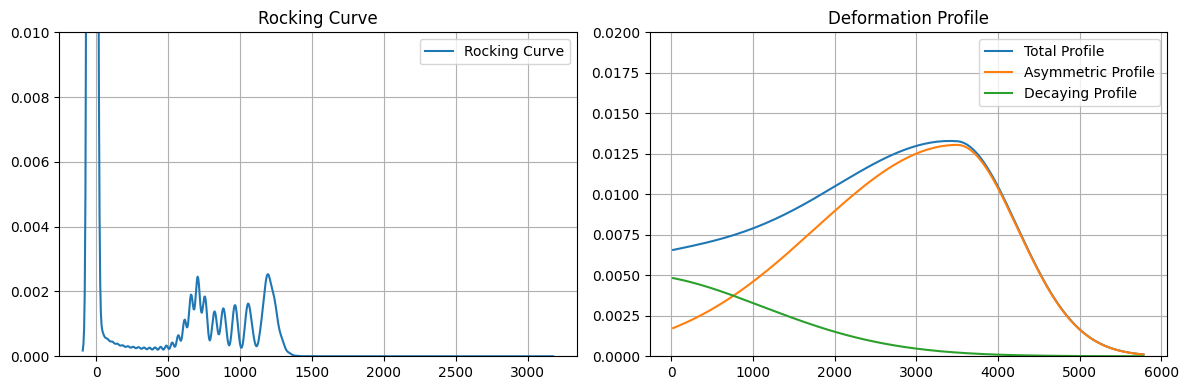

In [ ]:
# ПРИКЛАД ВИВЕДЕННЯ ОДНІЄЇ КРИВОЇ ТА ПРОФІЛЮ ДЕФОРМАЦІЇ
import xrd
from importlib import reload
reload(xrd)

params_obj = xrd.DeformationProfile(
    Dmax1=0.01305,
    D01=0.0017,
    L1=5800e-8,
    Rp1=3500e-8,
    D02=0.004845,
    L2=4000e-8,
    Rp2=-500e-8,
    Dmin=0.0001,
    dl=40e-8
)

curve, profile = xrd.compute_curve_and_profile(params_obj=params_obj)

fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # 12 width, 4 height

axes[0].set_title("Rocking Curve")
axes[0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="Rocking Curve")
axes[0].set_ylim(0, 0.01)
axes[0].grid(True)
axes[0].legend()

axes[1].set_title("Deformation Profile")
axes[1].plot(profile.X, profile.total_Y, label="Total Profile")
axes[1].plot(profile.X, profile.asymmetric_Y, label="Asymmetric Profile")
axes[1].plot(profile.X, profile.decaying_Y, label="Decaying Profile")
axes[1].set_ylim(0, 0.02)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# compare original params/normalized/denormalized
from train_from_file import PickleXRDDataset, denorm_params

ds_tr = PickleXRDDataset(X_train[[0, 0]], Y_train[[0, 0]], train=True)
print(ds_tr)
dl_tr = torch.utils.data.DataLoader(ds_tr, shuffle=True)
print(ds_tr)

for x, y in dl_tr:
    x, y = x.to('cpu'), y.to('cpu')
    print(x.shape, y.shape)

print(X_train[[0, 0]])
print(y)
denorm_params(y)

torch.Size([1, 1, 650]) torch.Size([1, 7])
torch.Size([1, 1, 650]) torch.Size([1, 7])
tensor([[ 2.8431e-02,  2.1039e-02,  6.2100e-05,  1.0400e-05,  2.9092e-03,
          1.6600e-05, -3.3800e-05],
        [ 2.8431e-02,  2.1039e-02,  6.2100e-05,  1.0400e-05,  2.9092e-03,
          1.6600e-05, -3.3800e-05]], device='mps:0')
tensor([[0.9440, 0.6910, 0.8683, 0.1486, 0.0325, 0.1100, 0.4367]])


tensor([[ 2.8431e-02,  2.1039e-02,  6.2100e-05,  1.0400e-05,  2.9092e-03,
          1.6600e-05, -3.3800e-05]])

True params: [0.025, 0.0025, 3.5e-05, 2.99e-05, 0.015, 2.5e-05, -6.01e-05], Pred params: [0.023924, 0.003046, 3.93e-05, 3.289e-05, 0.013852, 2.795e-05, -5.024e-05]
True params: [0.025, 0.0025, 7e-05, 3.99e-05, 0.0125, 2.5e-05, -1e-07], Pred params: [0.023408, 0.003665, 6.953e-05, 3.655e-05, 0.012616, 2.854e-05, -1.932e-06]
True params: [0.025, 0.005, 5e-05, 4.99e-05, 0.02, 3.5e-05, -4.01e-05], Pred params: [0.024783, 0.005856, 5.116e-05, 4.685e-05, 0.019503, 3.979e-05, -3.088e-05]
True params: [0.02, 0.0025, 4.5e-05, 1.99e-05, 0.0225, 5e-06, -4.01e-05], Pred params: [0.021542, 0.002661, 4.238e-05, 1.792e-05, 0.018714, 1.003e-05, -2.804e-05]
True params: [0.0125, 0.0075, 5e-05, 4.99e-05, 0.005, 5e-06, -6.01e-05], Pred params: [0.012453, 0.007293, 5.106e-05, 4.678e-05, 0.003457, 1.063e-05, -4.135e-05]
True params: [0.015, 0.0125, 6.5e-05, 9.9e-06, 0.01, 2.5e-05, -1e-07], Pred params: [0.011991, 0.00724, 6.968e-05, 1.17e-05, 0.016788, 3.165e-05, -1.933e-07]
True params: [0.0175, 0.005, 4.

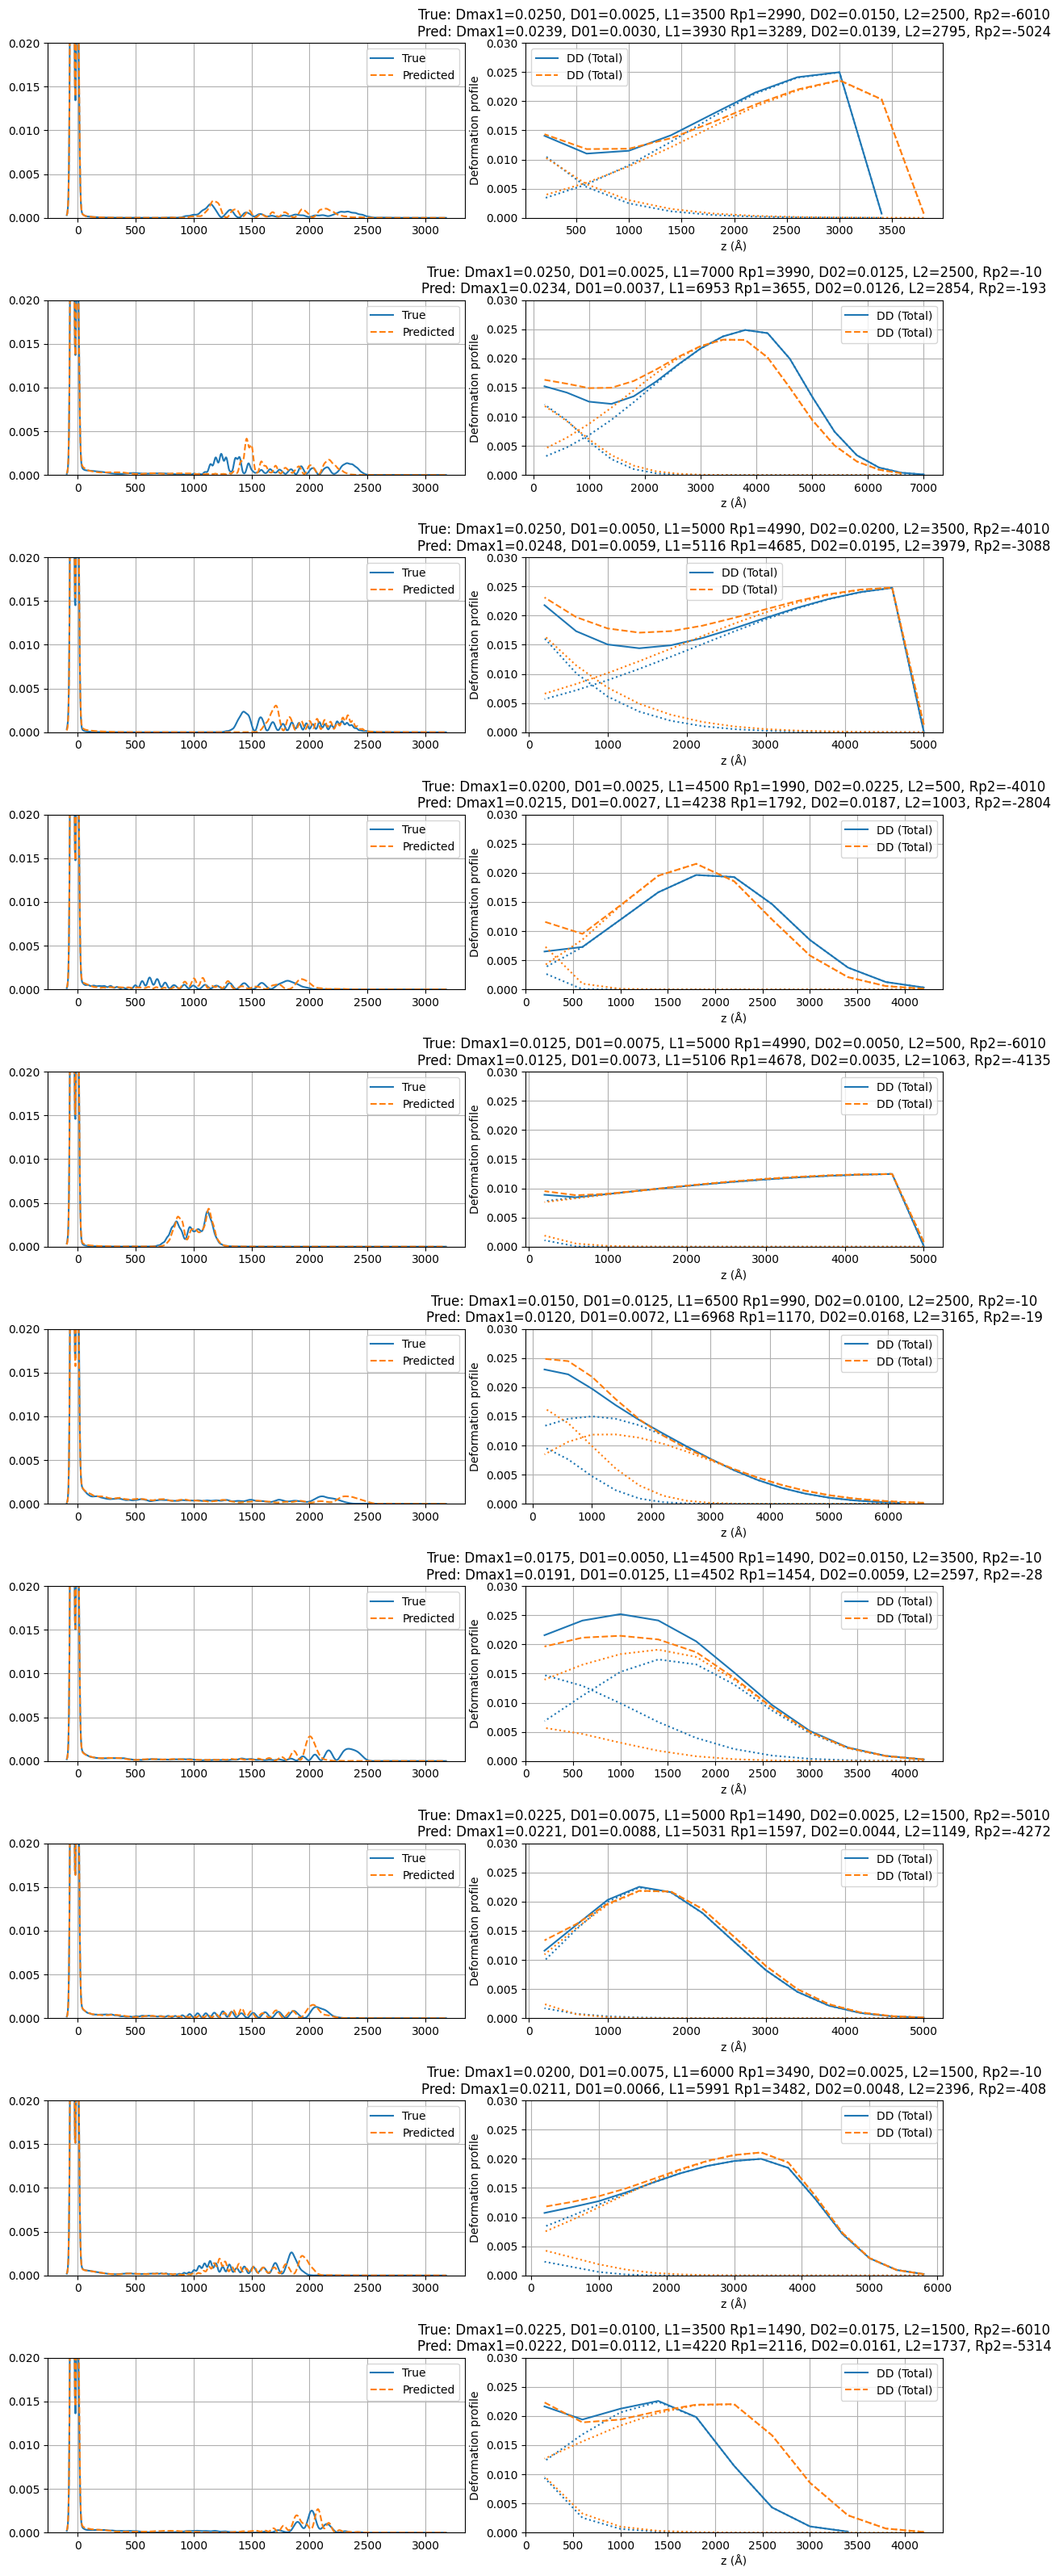

In [8]:
import matplotlib.pyplot as plt
import xrd
import helpers as h
from importlib import reload
reload(xrd)

# Examples after training (true vs predicted):
true_pred_pairs = [
  ([0.025000, 0.002500, 3.500e-05, 2.990e-05, 0.015000, 2.500e-05, -6.010e-05], [0.023924, 0.003046, 3.930e-05, 3.289e-05, 0.013852, 2.795e-05, -5.024e-05]),
  ([0.025000, 0.002500, 7.000e-05, 3.990e-05, 0.012500, 2.500e-05, -1.000e-07], [0.023408, 0.003665, 6.953e-05, 3.655e-05, 0.012616, 2.854e-05, -1.932e-06]),
  ([0.025000, 0.005000, 5.000e-05, 4.990e-05, 0.020000, 3.500e-05, -4.010e-05], [0.024783, 0.005856, 5.116e-05, 4.685e-05, 0.019503, 3.979e-05, -3.088e-05]),
  ([0.020000, 0.002500, 4.500e-05, 1.990e-05, 0.022500, 5.000e-06, -4.010e-05], [0.021542, 0.002661, 4.238e-05, 1.792e-05, 0.018714, 1.003e-05, -2.804e-05]),
  ([0.012500, 0.007500, 5.000e-05, 4.990e-05, 0.005000, 5.000e-06, -6.010e-05], [0.012453, 0.007293, 5.106e-05, 4.678e-05, 0.003457, 1.063e-05, -4.135e-05]),
  ([0.015000, 0.012500, 6.500e-05, 9.900e-06, 0.010000, 2.500e-05, -1.000e-07], [0.011991, 0.007240, 6.968e-05, 1.170e-05, 0.016788, 3.165e-05, -1.933e-07]),
  ([0.017500, 0.005000, 4.500e-05, 1.490e-05, 0.015000, 3.500e-05, -1.000e-07], [0.019105, 0.012522, 4.502e-05, 1.454e-05, 0.005860, 2.597e-05, -2.799e-07]),
  ([0.022500, 0.007500, 5.000e-05, 1.490e-05, 0.002500, 1.500e-05, -5.010e-05], [0.022127, 0.008797, 5.031e-05, 1.597e-05, 0.004402, 1.149e-05, -4.272e-05]),
  ([0.020000, 0.007500, 6.000e-05, 3.490e-05, 0.002500, 1.500e-05, -1.000e-07], [0.021096, 0.006571, 5.991e-05, 3.482e-05, 0.004752, 2.396e-05, -4.084e-06]),
  ([0.022500, 0.010000, 3.500e-05, 1.490e-05, 0.017500, 1.500e-05, -6.010e-05], [0.022197, 0.011212, 4.220e-05, 2.116e-05, 0.016100, 1.737e-05, -5.314e-05]),
]

def plot_profils(ax, profile, color, linestyle, pred=False):
    # L = dl * km
    # x_vals = [(L - dl * k + dl / 2) / 1e-8 for k in range(1, km + 1)]
    # ax.figure(figsize=(5, 3))
    ax.plot(profile.X, profile.total_Y, label='DD (Total)', color=color, linestyle=linestyle)
    # 'DDPL1 (Asymmetric Gaussian)'
    ax.plot(profile.X, profile.asymmetric_Y, label=None, linestyle=':', color=color)
    # 'DDPL2 (Decaying Gaussian)'
    ax.plot(profile.X, profile.decaying_Y, label=None, linestyle=':', color=color)
    ax.set_xlabel('z (Å)')
    ax.set_ylabel('Deformation profile')
    # ax.set_title('Deformation Profile Components')

fig, axes = plt.subplots(len(true_pred_pairs), 2, figsize=(12, 32))
plt.subplots_adjust(hspace=0.6)  # add vertical space between rows

for i, (true_params, pred_params) in enumerate(true_pred_pairs):
    print(f"True params: {true_params}, Pred params: {pred_params}")
    # add true_params to plot

    curve, profile_true = xrd.compute_curve_and_profile(array=true_params, dl=400e-8)
    
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="True")
    axes[i, 0].grid(True)
    axes[i, 0].set_ylim(0, 0.02)

    plot_profils(axes[i, 1], profile_true, 'C0', '-')

    curve, profile_pred = xrd.compute_curve_and_profile(array=pred_params, dl=400e-8)

    plot_profils(axes[i, 1], profile_pred, 'C1', '--')
    axes[i, 0].plot(curve.X_DeltaTeta, curve.Y_R_vseZ, label="Predicted", linestyle='dashed')
    axes[i, 1].set_title(f"True: {h.fparam(arr=true_params)}\nPred: {h.fparam(arr=pred_params)}")
    axes[i, 1].grid(True)
    axes[i, 1].set_ylim(0, 0.03)
    axes[i, 1].legend()
    axes[i, 0].legend()


plt.tight_layout()
plt.show()